<a href="https://colab.research.google.com/github/PandukaBandara99/ML_Books/blob/main/ML_01_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br> UG @ Dpt. of Electronic & Electrical Engineering ;<br> University of Peradeniya ;<br> 2023/03 <br><br> Email : e19039@end.pdn.ac.lk <br> LinkedIN : https://www.linkedin.com/in/pandukabandara/

# Introduction

In supervised learning , learn begins from given correct data set of (feature,target) and the learning algorythem is used to identify the mapping function for those data set.

*   Regression : For continuous functions ,predicts numbers.
*   Classification : Predicts caegories ,Descrete outcomes.



Terminology

*   $x$  = "Input variables , called features
*   $y$  = "Output variables" , called targets  ~ ~ ~ ~ $\hat{y}$ denotes the predicted outcomes.
*   m    = Number of training samples
*   $(x,y)$ = single training example
*   $(x^{(i)},y^{(i)})$ = $i^{th}$ example
*   







---

# 1 Supervised Machine Learning: Regression




## 1.1 Single Variable Systems



### 1.1.1 Theory

**Model equation :** <br><br> $f_{w,b}(x) \ \ =w.X + b \ \ \ $ <br>
$\ \ \ \ \ \ \ \hat{y}^{(i)} \   = \ w.X^{(i)} + b $

**Cost Function:** <br><br>
$J_{(w,b)} \ = \ \frac{1}{2m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)})^2$ <br>
To get the best fit line ,  (w,b) for minimum  $\ J_{(w,b)} \ $ should be obtained.

**Gradient descent algorythm :** <br> <br>



```
initial random w,b
learning rate alpha

@Loop untill converges
temp_w = w - alpha * dj_dw
temp_b = b - alpha * dj_db
w,b    = temp_w,temp_b

break : if J reached its minimum value (~1% variation)

```

where, <br>

dj_dw = $ \frac{\partial J_{(w,b)}}{\partial w} \ \ \ $ and $ \ \ \ $ dj_db = $ \frac{\partial J_{(w,b)}}{\partial b}$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}).X^{(i)} ------------(A)$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}) --------------(B)$


**Code**

### 1.1.2 Example 01 : Housing prices




| Size (1000 sqft)    | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0                 | 250                      |
| 1.7                  | 300                      |
| 2.0                  | 480                      |
| 2.5                  | 430                      |
|3.0 |630|
|3.2| 730|

In [ ]:
#Linear regression for single variable

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''

# Initialize Training Examples
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730])

# Initial conditions for gradient descent
learning_rate = 0.01
initial_w = 1000
initial_b = 1000
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.001




''' 
Do not change below
'''


# ~Data Extraction~

# Sample size (m)
m = x_train.shape[0]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_single_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0 

  for i in range(m):
    cost_holder += (w*x[i] + b - y[i])**2
  
  #Avoid zero devison
  if cost_holder == 0:
     cost_holder =0
  else:
    cost_holder = cost_holder/(2*m) 

  # Return the cost
  return cost_holder 


'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient(x,y,w,b,m):

  # Temp Data holders for two returns
  temp_dj_dw = 0
  temp_dj_db = 0

  # Loop for m times (i=0 to i = m-1)
  for i in range(m):

    # Calculate dj_dw and sum According to the equation (A)
    temp_dj_dw += (w*x[i] + b - y[i])*x[i]

    # Calculate dj_db and sum According to the equation (B)
    temp_dj_db += w*x[i] + b - y[i]
  
  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0
  
  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent():
  # Load the data & conditions to the function 
  global x_train,y_train,initial_w,initial_b,m,learning_rate,number_of_iterations

  # Store calculated J 
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []
  
  #Store temp w,b
  w  = initial_w
  b  = initial_b

  # Loop for given iterations 
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient(x_train,y_train,w,b,m)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_single_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]

    # Breaking when converged
    if dj_dw < learning_rate*convergence_factor and dj_db < learning_rate*convergence_factor:
      print(i)
      break

    
  return w,b,J_log,Parameter_log


 Code Explanations

*   Uses numpy , matplotlib and math libraries
*   X and Y datasets are vectoriezed using numpy.array
*   x_train.shape returns a tuple (rows,columns).So need to get the row value by using x_train.shape[0] ~ As in the example it returns (6,) => 6 
*   List item








### 1.1.3 **Data Extractions** <br>
1. Calculating the cost for a given (w,b)


In [ ]:
#Calculate Cost for given w=200 and b = -100
w= 200 
b=-100
cost_Value = cost_function_for_single_variable(x_train,y_train,w, b ,m)
print(cost_Value)

9366.666666666666


2. Data Plotting the Cost Value Destribution (~Scatter)




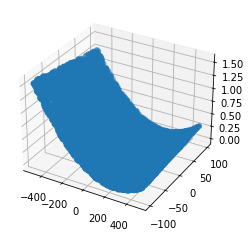

 The minimum vaue for the cost function is 1737.9933333333322 
 The best fit (w,b)      : ( 212 , -3) 
 Actual values for given : (209,2.4))


In [ ]:
#Define Limits {X:w, Y:b, Z:J}
w_min = -500
w_max = 500

b_min = -100
b_max = 100

# Use Larger for a fine Values
Sample_count = 10000 ; 

# Sampling the 3d space
W_set = np.random.randint(w_min,w_max,(Sample_count,))
b_set = np.random.randint(b_min,b_max,(Sample_count,))
J_set = np.zeros(Sample_count)

# Calculating the Cost for each (w,b)
for i in range(Sample_count):
  J_set[i] = cost_function_for_single_variable(x_train,y_train,W_set[i], b_set[i] ,m)


# Visualization of the cost destribution ~ 3D scatter 

from mpl_toolkits import mplot3d
ax = plt.axes(projection = "3d")

ax.scatter(W_set,b_set,J_set)
plt.show()

#Get the minimum valued element id 
minElementID = int(np.where(J_set == np.amin(J_set))[0])

print(" The minimum vaue for the cost function is {} \n The best fit (w,b)      : ( {} , {}) \n Actual values for given : (209,2.4))".format(J_set[minElementID],W_set[minElementID],b_set[minElementID]))


In [ ]:
# Since collab isn't allowing to rotate the plots,
import plotly.graph_objects as go
import numpy as np

# Helix equation
x, y, z = W_set, b_set, J_set

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='black', opacity=0.80)])
fig.show()

3. Calculating w,b using gradient descent algorythm

In [ ]:
# Calculate for given data & initial conditions for Example 1.1
w_final,b_final,J_log,P_log = gradient_descent()

# Print W,b & round for 4 decimal plaecs
print("W,b values for the best fit line is :{0:10.4f} & {0:10.4f} ".format( w_final,b_final))

17376
W,b values for the best fit line is :  209.3629 &   209.3629 


In [ ]:
# Plot the Convergence log


J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

## 1.2 Multi variable system



### 1.2.1 Notation


Notation updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example matrix                  | `X_train` |   
|  $\mathbf{Y}$  | training example  targets                | `Y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 


### 1.2.2 Theory



**Training example matrix** <br>
$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  



**Parameter vector w, b**

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  



**Model Prediction With Multiple Variables** <br><br>
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector dot product



**Compute Cost With Multiple Variables**

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 




**Gradient descent for multiple variables:** <br>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \newline \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

### 1.2.3 Example 02 : Housing Price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [ ]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-7

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  100.0

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 1000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.00001


''' 
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = x_train.shape[0]
# n ~ The number of features <~~ Column count
n = x_train.shape[1]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_multi_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0.0

  for i in range(m):
    cost_holder += (np.dot(x[i],w)+b-y[i])**2
  
  #Avoid zero devison
  if (cost_holder == 0.0):
    cost_holder = 0.0
  else:
    cost_holder = cost_holder/(2*m) 

  # Return the cost
  return cost_holder 

'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient_multi(x,y,w,b,m,n):

  # Temp Data holders for two returns
  temp_dj_dw = np.zeros((n,)) # elements count equal to columns
  temp_dj_db = 0.0

  for i in range(m):
     
    Error_calculate = np.dot(x[i],w)+b-y[i]
    # Calculate dj_db 
    # Loop for m times (~ Eq to number of Rows)
    temp_dj_db  +=  Error_calculate

    #Loop for each i th set of training examples
    for j in  range(n):
      temp_dj_dw[j] += Error_calculate*x[i,j]

  
  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0
  
  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent_multi():
  # Load the data & conditions to the function 
  global x_train,y_train,initial_w,initial_b,m,n,learning_rate,number_of_iterations

  # Store calculated J 
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []
  
  #Store temp w,b
  w  = np.copy(initial_w)
  b  = initial_b

  # Comparing vector
  comparing_dj_dw_vector = learning_rate*convergence_factor*np.ones(n) 
  

  # Loop for given iterations 
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient_multi(x_train,y_train,w,b,m,n)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_multi_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]
      

    # Breaking when converged
    if (dj_dw**2 < comparing_dj_dw_vector**2).all() and dj_db < learning_rate*convergence_factor:
      print(dj_dw,comparing_dj_dw_vector)
      print(dj_dw <comparing_dj_dw_vector)
      print(i)
      break
    
  return w,b,J_log,Parameter_log


**Testing**

In [ ]:
#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b 
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



W,b values for the best fit line is :[-2.52 99.8  99.67 92.77] & 99.77448108024004 


**Plotting the convergence**

In [ ]:
# Plot the Convergence log
J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

### 1.2.4 Feature Engineering

The algorythem in example 1.2.3 is not accurate.When the alpha and initial values are changed , the prediction accuracy changes drastically. This can be eleminated by feature scaling

Three different techniques: (There are many) 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features , and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 

In [ ]:
"""
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)



**Solve the above 1.2.4 using feature scaled example sets**

In [ ]:
''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.00001

'''
Feature scaling
'''
X_norm, mu, sigma = zscore_normalize_features(x_train)

x_train = X_norm

'''Run gradient descent'''


'Run gradient descent'

Test 01 :

In [ ]:
'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-3

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  0.0

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 40000

#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b 
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



[ 3.34e-09 -3.34e-09  4.98e-08  6.19e-09] [5.e-08 5.e-08 5.e-08 5.e-08]
[ True  True  True  True]
4298
W,b values for the best fit line is :[ 35.14  53.33 -28.93  27.67] & 289.9999998729948 


Test 2 :

## **1.3 Advanced Vectorized Multi variable system (TBD)**


Consider the above same example: 1.2.3 Housing price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [ ]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
X_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])



#Initial conditions for gradient descent

# Learning rate ~ Better if small
learning_rate = 0.01

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 0.5, 19, -60, -42])

# Initial value for b
initial_b = 1000

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.001



''' 
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = X_train.shape[0]
# n ~ The number of features <~~ Column count
n = X_train.shape[1]




# 2 Supervised Machine Learning: Classification

## 2.1 Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 


* Logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model,  can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$ <br><br>
  


## 2.2 Cost function

  
Cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

<br>


The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$





In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

##2.3 Logistic Gradient Descent


T gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


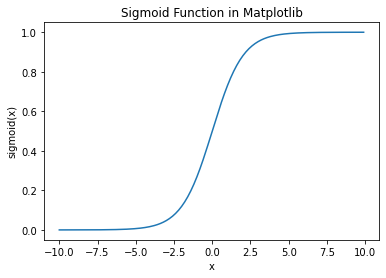

In [ ]:
# Plotting the Sigmoid Function in Python with Matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

##2.4 **Algorythm**

**Dataset**

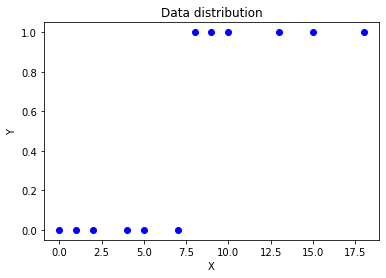

In [ ]:
x_train = np.array([0,1,2,4,5,7,8,9,10,13,15,18])
y_train = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

# Plotting the data
plt.plot(x_train, y_train ,'bo')
plt.xlabel('X') #Tumor size
plt.ylabel('Y') # Is Cancerous Y = 1 , N = 0
plt.title('Data distribution')
plt.show()

In [ ]:
#two feature data set
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])


#Compute the sigmoid of z
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g


#Computes cost
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

w_in = np.zeros((1))
b_in = 0


#Computes the gradient for linear regression
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

#Performs batch gradient descent
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
   
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = np.copy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


**Set 1**

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


**Set 2**

**Set 1**

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


#3 Additional

##3.1  overfitting

## 3.2 Regularized Cost and Gradient

### 3.2.1 Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [ ]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


### 3.2.2 Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice. 

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


### 3.2.3  Gradient descent with regularization

The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.


Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

In [ ]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [ ]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  


In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
